In [7]:
class Tree:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

    def add(self, item):
        if self.value is None:
            self.value = item
        elif item < self.value:
            if self.left:
                self.left.add(item)
            else:
                self.left = Tree(item)
        elif item > self.value:
            if self.right:
                self.right.add(item)
            else:
                self.right = Tree(item)

    def __contains__(self, item):
        if self.value == item:
            return True
        elif self.left and item < self.value:
            return item in self.left
        elif self.right and item > self.value:
            return item in self.right
        else:
            return False

Replace the contains method of the tree with the following __contains__ method. The change in name will allow you to use the in operator; e.g. after this change, 55 in my_tree should be True in the above example, whereas 42 in my_tree would be False. Test this.

In [8]:
import random
my_tree = Tree()
test_tree = [55, 62, 37, 49, 71, 14, 17]
for item in test_tree:
    my_tree.add(item)
print(55 in my_tree)
print(42 in my_tree)
print(71 in my_tree)
print(4 in my_tree)

True
False
True
False


Using various sizes n of trees (populated with random data) and sufficiently many calls to in (each individual call should be very fast, so you may have to run many repeated tests), demonstrate that in is executing in O(log n) times; on a log-log plot, for sufficiently large n, the graph of time required for checking if a number is in the tree as a function of n should be almost horizontal. (5 points).

In [4]:
import random
import time
import matplotlib.pyplot as plt

In [9]:
time_per_test = []
n_samples = 1000
repeat_times = 100
for _ in range(n_samples):
    n = random.randint(0, 10000)
    my_tree = Tree()
    for _ in range(n):
        my_tree.add(random.random())
    start = time.time()
    for _ in range(repeat_times):
        my_tree.__contains__(random.random())
    end = time.time()
    time_per_test.append((end - start, n))

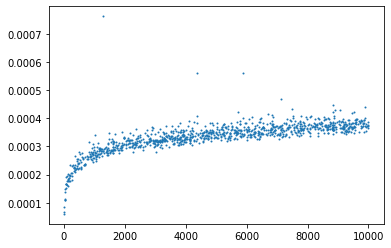

In [11]:
plt.scatter([x[1] for x in time_per_test], [x[0] for x in time_per_test], s=1)
plt.show()

As shown in the above plot, the in is executing in O(log n) times.

This speed is not free. Provide supporting evidence that the time to setup the tree is O(n log n) by timing it for various sized ns and showing that the runtime lies between a curve that is O(n) and one that is O(n**2). (5 points)

This way is to draw two graphs of extream situation,O(n) and O(n**2), which means that the runtime must lie between those two curves. 

If the input secquence is random enough, the tree is almost balanced and the setup time is O(n), as shown below

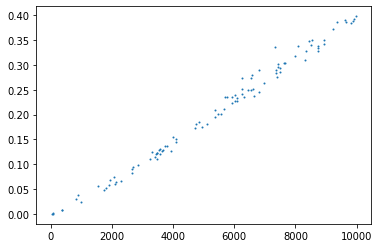

In [12]:
time_per_test = []
n_samples = 100
repeat_times = 10
for _ in range(n_samples):
    n = random.randint(0, 10000)
    secquence = [random.random() for _ in range(n)]
    start = time.time()
    for _ in range(repeat_times):
        my_tree = Tree()
        for i in secquence:
            my_tree.add(i)
    end = time.time()
    time_per_test.append((end - start, n))

plt.scatter([x[1] for x in time_per_test], [x[0] for x in time_per_test], s=1)
plt.show()

However, if the input is inversely sorted, than the setup time is O(n**2)

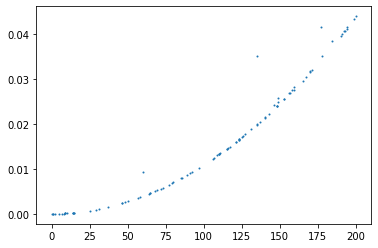

In [13]:
time_per_test = []
n_samples = 100
repeat_times = 10
for _ in range(n_samples):
    n = random.randint(0, 200)
    secquence = [random.random() for _ in range(n)]
    secquence = sorted(secquence)
    start = time.time()
    for _ in range(repeat_times):
        my_tree = Tree()
        for i in secquence:
            my_tree.add(i)
    end = time.time()
    time_per_test.append((end - start, n))

plt.scatter([x[1] for x in time_per_test], [x[0] for x in time_per_test], s=1)
plt.show()

If I create a function and put actual time spend, n**2, and n in one graph.

In [13]:
def timefunc(n):
    times = []
    n = [random.randint(1,n) for _ in range(n)]
    for attempt in [i for i in range(100)]:
        start = time.time
        my_tree = Tree()
        for item in n:
            my_tree.add(item)
        end = time.time()
        times.append(end - start)
    return min(times)

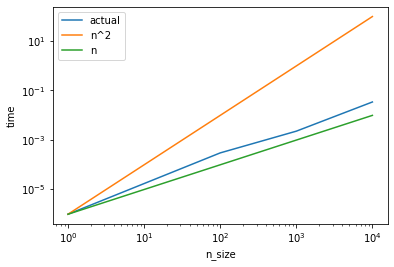

In [14]:
ns = [1,100,1000,10000] #Select different n size
actual = [timefunc(n) for n in ns]
s = actual [0]
quadratic = [s*n**2 for n in ns] 
linear = [s*n for n in ns]
plt.plot(ns,actual)
plt.plot(ns,quadratic)
plt.plot(ns,linear)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time')
plt.xlabel('n_size')
plt.legend(['actual','n^2','n'],loc = 'upper left')
plt.show()

As we can see from the above graph, the actual running time lies between O (n**2) and O (n). 